In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [4]:
df.info()
np.round(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0,45000.0
mean,28.0,80319.0,5.0,9583.0,11.0,0.0,6.0,633.0,0.0
std,6.0,80422.0,6.0,6315.0,3.0,0.0,4.0,50.0,0.0
min,20.0,8000.0,0.0,500.0,5.0,0.0,2.0,390.0,0.0
25%,24.0,47204.0,1.0,5000.0,9.0,0.0,3.0,601.0,0.0
50%,26.0,67048.0,4.0,8000.0,11.0,0.0,4.0,640.0,0.0
75%,30.0,95789.0,8.0,12237.0,13.0,0.0,8.0,670.0,0.0
max,144.0,7200766.0,125.0,35000.0,20.0,1.0,30.0,850.0,1.0


/tmp/ipykernel_3303/4017815012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/tmp/ipykernel_3303/4017815012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/tmp/ipykernel_3303/4017815012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seabo

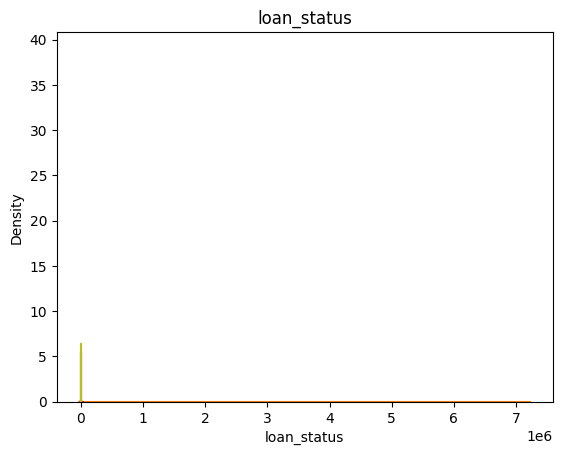

In [5]:
for i in df.select_dtypes(np.number).columns.tolist():
    sns.distplot(df[i])
    plt.title(i)
    # plt.show()

In [6]:
y = df.iloc[:, -1]
X = df.iloc[:, : -1]
X.head()
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

Handling Outliers

In [7]:
for i in X.select_dtypes(np.number).columns.tolist():
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - 1.5 * IQR
    max_val = Q3 + 1.5 * IQR
    X[i] = np.where(X[i] > max_val, max_val, (np.where(X[i] < min_val , min_val, X[i])))

Changing Columns

In [8]:
from sklearn.preprocessing import OneHotEncoder
gender_t = ColumnTransformer(transformers=[
    ("gend_t", OneHotEncoder(drop= "first", sparse_output= False, dtype= int), ["person_gender"])
], remainder= "passthrough", verbose_feature_names_out= False)

gen_x = pd.DataFrame(gender_t.fit_transform(X), columns= gender_t.get_feature_names_out())
gen_x.head()

,person_gender_male,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,0,22.0,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,No
1,0,21.0,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes
2,0,25.0,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.37,3.0,635.0,No
3,0,23.0,Bachelor,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,No
4,1,24.0,Master,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,No


In [9]:
df["person_education"].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [10]:
edu_t = ColumnTransformer(transformers=[
    ("edu_t", OrdinalEncoder(categories= [["High School", "Associate", "Bachelor", "Master", "Doctorate"]], dtype= int), ["person_education"])    
], remainder= "passthrough", verbose_feature_names_out= False)


x_edu = pd.DataFrame(edu_t.fit_transform(gen_x), columns= edu_t.get_feature_names_out())
x_edu.head()

,person_education,person_gender_male,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,3,0,22.0,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,No
1,0,0,21.0,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes
2,0,0,25.0,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.37,3.0,635.0,No
3,2,0,23.0,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,No
4,3,1,24.0,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,No


creating bins for person_income by making new column person_income_binned

In [11]:
def bin_income_data(X: pd.DataFrame) -> pd.DataFrame:
    
    X_out = X.copy()
    
    bins = [
        -float('inf'), 
        150000,        
        400000,        
        1200000,       
        4000000,       
        float('inf')
    ]

    labels = [
        "Destitute", 
        "Lower Middle", 
        "Middle", 
        "Upper Middle", 
        "Rich"
    ]
    
    X_out["person_income_binned"] = pd.cut(
        X_out["person_income"],
        bins=bins,
        labels=labels,
        include_lowest=True,
        right=True
    )
    
    X_out = X_out.drop(columns=["person_income"])

    return X_out

income_bin_transformer = FunctionTransformer(bin_income_data, validate=False)

In [12]:
enc_income = ColumnTransformer(transformers=[
    ("inc_enc", OrdinalEncoder(categories= [["Destitute", "Lower Middle", "Middle", "Upper Middle", "Rich"]], dtype= int), ["person_income_binned"])
], remainder= "passthrough", verbose_feature_names_out= False)

In [13]:
bins = [
    -float('inf'),
    150000,        
    400000,        
    1200000,       
    4000000,       
    float('inf')   
]


labels = [
    "Destitute", 
    "Lower Middle", 
    "Middle", 
    "Upper Middle", 
    "Rich"
]

x_edu["person_income_binned"] = pd.cut(
    x_edu["person_income"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True)
x_edu = x_edu.drop("person_income", axis=1)
x_edu["person_income_binned"].value_counts()
x_edu.head()

,person_education,person_gender_male,person_age,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_income_binned
0,3,0,22.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,No,Destitute
1,0,0,21.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,Destitute
2,0,0,25.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.37,3.0,635.0,No,Destitute
3,2,0,23.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,No,Destitute
4,3,1,24.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,No,Destitute


Applying ordinal encoder to person income binned

In [14]:
income_t = ColumnTransformer(transformers=[
    ("income_t", OrdinalEncoder(categories=[["Destitute", "Lower Middle", "Middle", "Upper Middle", "Rich"]], dtype=int), ["person_income_binned"])
], remainder="passthrough", verbose_feature_names_out= False)

x_inc = pd.DataFrame(income_t.fit_transform(x_edu), columns= income_t.get_feature_names_out())
x_inc.head()

,person_income_binned,person_education,person_gender_male,person_age,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,0,3,0,22.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,No
1,0,0,0,21.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes
2,0,0,0,25.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.37,3.0,635.0,No
3,0,2,0,23.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,No
4,0,3,1,24.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,No


binnning age 

In [15]:
def age_binning(x):
    x_inc = x.copy()
    bins = [
        21,      
        30,        
        45,       
        58,       
        float('inf')   
    ]


    labels = [
        2,
        3,
        1,
        0
    ]

    x_inc["person_age_binned"] = pd.cut(
        x_inc["person_age"],
        bins=bins,
    labels=labels,
    include_lowest=True,
    right=True)
    x_inc = x_inc.drop("person_age", axis=1)


previous loan encoding

In [16]:
prev_loan_t = ColumnTransformer(transformers=[
    ("prev_loan_enc", OneHotEncoder(sparse_output= False, dtype= int, drop = "first"), ["previous_loan_defaults_on_file"])
], remainder= "passthrough", verbose_feature_names_out= False)

In [17]:
home_t = ColumnTransformer(transformers=[
    ("home_trans", OneHotEncoder(dtype= int, sparse_output= False), ["person_home_ownership"])
], remainder= "passthrough", verbose_feature_names_out= False)

In [18]:
intent_t = ColumnTransformer(transformers=[
    ("loan_intent_t", OneHotEncoder(dtype = int, sparse_output=False), ["loan_intent"])
], remainder = "passthrough", verbose_feature_names_out= False)

In [19]:
from sklearn import set_config
set_config(transform_output= "pandas")
final_pieline = Pipeline(steps =[
    ("gender_t", gender_t),
    ("education_trans", edu_t),
    ("binning_income", income_bin_transformer),
    ("income_enc", enc_income),
    ("prev_loan_enc", prev_loan_t),
    ("home_t", home_t),
    ("loan_intent_t", intent_t)
])

d = final_pieline.fit_transform(X)
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   loan_intent_DEBTCONSOLIDATION       45000 non-null  int64  
 1   loan_intent_EDUCATION               45000 non-null  int64  
 2   loan_intent_HOMEIMPROVEMENT         45000 non-null  int64  
 3   loan_intent_MEDICAL                 45000 non-null  int64  
 4   loan_intent_PERSONAL                45000 non-null  int64  
 5   loan_intent_VENTURE                 45000 non-null  int64  
 6   person_home_ownership_MORTGAGE      45000 non-null  int64  
 7   person_home_ownership_OTHER         45000 non-null  int64  
 8   person_home_ownership_OWN           45000 non-null  int64  
 9   person_home_ownership_RENT          45000 non-null  int64  
 10  previous_loan_defaults_on_file_Yes  45000 non-null  int64  
 11  person_income_binned                45000

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d, y, train_size= 0.7)


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight= "balanced")
model = rf.fit(X_train, y_train)

In [22]:
pred = model.predict(X_test)

In [23]:
np.mean(cross_val_score(model, X_test, y_test, scoring= "roc_auc", cv= 10, n_jobs= 1))

np.float64(0.9660224931124969)

In [24]:
np.mean(cross_val_score(model, X_test, y_test, scoring= "precision", cv= 10, n_jobs= 1))

np.float64(0.8898254678118516)

In [25]:
np.mean(cross_val_score(model, X_test, y_test, scoring='recall', cv=10))

np.float64(0.7138682170542635)

In [26]:
np.mean(cross_val_score(model, X_test, y_test, scoring='f1', cv=10))

np.float64(0.7928105783810536)

In [28]:
np.mean(cross_val_score(model, X_test, y_test, scoring='accuracy', cv=10))

np.float64(0.916673465471393)